# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hri_tools import HumorDataset, MetaHumorDataset, MetaHumorDatasetCreator
from hri_tools import SUPPORTED_DATASETS, HRI_PAPER_2023_DATASETS
from hri_tools import download
from hri_tools import calc_divergence
from hri_tools import calc_divergence_between_target
from hri_tools import calc_vocab_for_labels

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import copy

# Download datasets

In [5]:
%env HRI_URL=###PASTE HERE###
%env HRI_PASSWORD=###PASTE HERE###

env: HRI_URL=###PASTE HERE###
env: HRI_PASSWORD=###PASTE HERE###


In [6]:
# download()

# Load datasets and get statistics

In [7]:
print(SUPPORTED_DATASETS)

['funlines_and_human_microedit_paper_2023', 'funlines_v1', 'funlines_v2', 'human_microedit_v1', 'human_microedit_v2', 'meta_dataset', 'one_liners', 'onion_or_not', 'pun_of_the_day', 'reddit_jokes_last_laught', 'semeval_2017_task_7', 'semeval_2021_task_7', 'unfun_me', 'short_jokes', 'the_naughtyformer']


In [8]:
print(HRI_PAPER_2023_DATASETS)

['funlines_and_human_microedit_paper_2023', 'one_liners', 'onion_or_not', 'pun_of_the_day', 'reddit_jokes_last_laught', 'semeval_2017_task_7', 'semeval_2021_task_7', 'unfun_me', 'short_jokes', 'the_naughtyformer']


### Example of meta dataset

In [9]:
mdf = MetaHumorDatasetCreator(
    params=[
        {
            "name":"pun_of_the_day",
            "drop_which_dup": False,
            "sample_from_train": None,
            "sample_from_test": None,
            "sample_from_valid": None
        },
        {
            "name":"semeval_2021_task_7",
            "drop_which_dup": False,
            "sample_from_train": None,
            "sample_from_test": None,
            "sample_from_valid": None
        },
        {
            "name":"unfun_me",
            "drop_which_dup": False,
            "sample_from_train": None,
            "sample_from_test": None,
            "sample_from_valid": None
        },
        {
            "name":"short_jokes",
            "drop_which_dup": True,
            "sample_from_train": 10_000,
            "sample_from_test": 5_000,
            "sample_from_valid": 5_000
        }
    ]
)

### Load data

In [10]:
all_data = list()
for name in HRI_PAPER_2023_DATASETS:
    all_data.append(
        HumorDataset(
            name=name
        )
    )

for i in range(len(all_data)):
    all_data[i].load()

In [11]:
all_data.append(
    mdf.create_dataset()
)

In [12]:
for i in range(len(all_data)):
    all_data[i].calc_statistics()

for i in range(len(all_data)):
    all_data[i].print_statistics_report()


        Statistics report for funlines_and_human_microedit_paper_2023 dataset:
        Number of samples: 23597, pos - 13432, neg - 10165.

        Stats for train/test/valid:
        Number of samples train: 16518, pos - 9447, neg - 7071.
        Number of samples test: 4719, pos - 2672, neg - 2047.
        Number of samples valid: 2360, pos - 1313, neg - 1047.

        Mean word length is 12.554858668474806, pos - 12.540500297796306, neg - 12.573831775700935
        Mean length by symbols is 71.7370852226978 (without space is 59.79154129762258)
        

        Statistics report for one_liners dataset:
        Number of samples: 31696, pos - 15979, neg - 15717.

        Stats for train/test/valid:
        Number of samples train: 22188, pos - 11249, neg - 10939.
        Number of samples test: 6338, pos - 3174, neg - 3164.
        Number of samples valid: 3170, pos - 1556, neg - 1614.

        Mean word length is 12.575719333669864, pos - 14.770386131797984, neg - 10.34446777374817

# Working with vocab

In [8]:
for i in range(len(all_data)):
    all_data[i].run_preprocessing()

for i in range(len(all_data)):
    all_data[i].build_vocab()

In [14]:
print(calc_divergence(all_data[0], all_data[1]))

{'Symmetrised KL divergence': 3.700175894667125, 'Jensen–Shannon divergence': None}


In [15]:
print(calc_divergence(all_data[1], all_data[0]))

{'Symmetrised KL divergence': 3.700175894667125, 'Jensen–Shannon divergence': None}


In [16]:
symmetrised_kl_divergence = list()
jensen_shannon_divergence = list()

for i in range(len(all_data)):
    for j in range(len(all_data)):
        result = calc_divergence(all_data[i], all_data[j])
        symmetrised_kl_divergence.append(
            (all_data[i].name, all_data[j].name, result['Symmetrised KL divergence'])
        )

        jensen_shannon_divergence.append(
            (all_data[i].name, all_data[j].name, result['Jensen–Shannon divergence'])
        )

In [17]:
df_stat = pd.DataFrame(symmetrised_kl_divergence, columns =['Dataset_x', 'Dataset_y', 'Score'])
df_stat_pivot_symmetrised_kl = df_stat.pivot('Dataset_x', 'Dataset_y','Score')
df_stat_pivot_symmetrised_kl = df_stat_pivot_symmetrised_kl.reindex(sorted(df_stat_pivot_symmetrised_kl.columns), axis=1)

/tmp/ipykernel_1697/2044256463.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_stat_pivot_symmetrised_kl = df_stat.pivot('Dataset_x', 'Dataset_y','Score')


In [18]:
df_stat_pivot_symmetrised_kl

Dataset_y,funlines_and_human_microedit_paper_2023,meta_dataset,one_liners,onion_or_not,pun_of_the_day,reddit_jokes_last_laught,semeval_2017_task_7,semeval_2021_task_7,short_jokes,the_naughtyformer,unfun_me
Dataset_x,,,,,,,,,,,
funlines_and_human_microedit_paper_2023,0.000000,2.662663,3.700176,1.993313,3.778023,4.457715,3.962775,3.924449,3.167246,2.483283,3.742783
meta_dataset,2.662663,0.000000,1.039660,1.457259,1.430303,1.617620,1.933039,0.867332,0.374214,1.046885,3.571197
one_liners,3.700176,1.039660,0.000000,2.004222,1.394661,1.599191,1.658923,1.098767,1.562572,1.969897,3.922416
onion_or_not,1.993313,1.457259,2.004222,0.000000,2.506149,2.496902,2.679383,1.894790,1.943771,2.109830,2.464321
pun_of_the_day,3.778023,1.430303,1.394661,2.506149,0.000000,1.854446,0.846162,1.489203,3.111970,2.789701,4.182227
reddit_jokes_last_laught,4.457715,1.617620,1.599191,2.496902,1.854446,0.000000,2.280310,1.172113,1.920361,2.620423,5.081017
semeval_2017_task_7,3.962775,1.933039,1.658923,2.679383,0.846162,2.280310,0.000000,1.798002,3.788029,3.310080,4.060869
semeval_2021_task_7,3.924449,0.867332,1.098767,1.894790,1.489203,1.172113,1.798002,0.000000,1.825333,2.150586,3.978123
short_jokes,3.167246,0.374214,1.562572,1.943771,3.111970,1.920361,3.788029,1.825333,0.000000,0.836827,5.952869


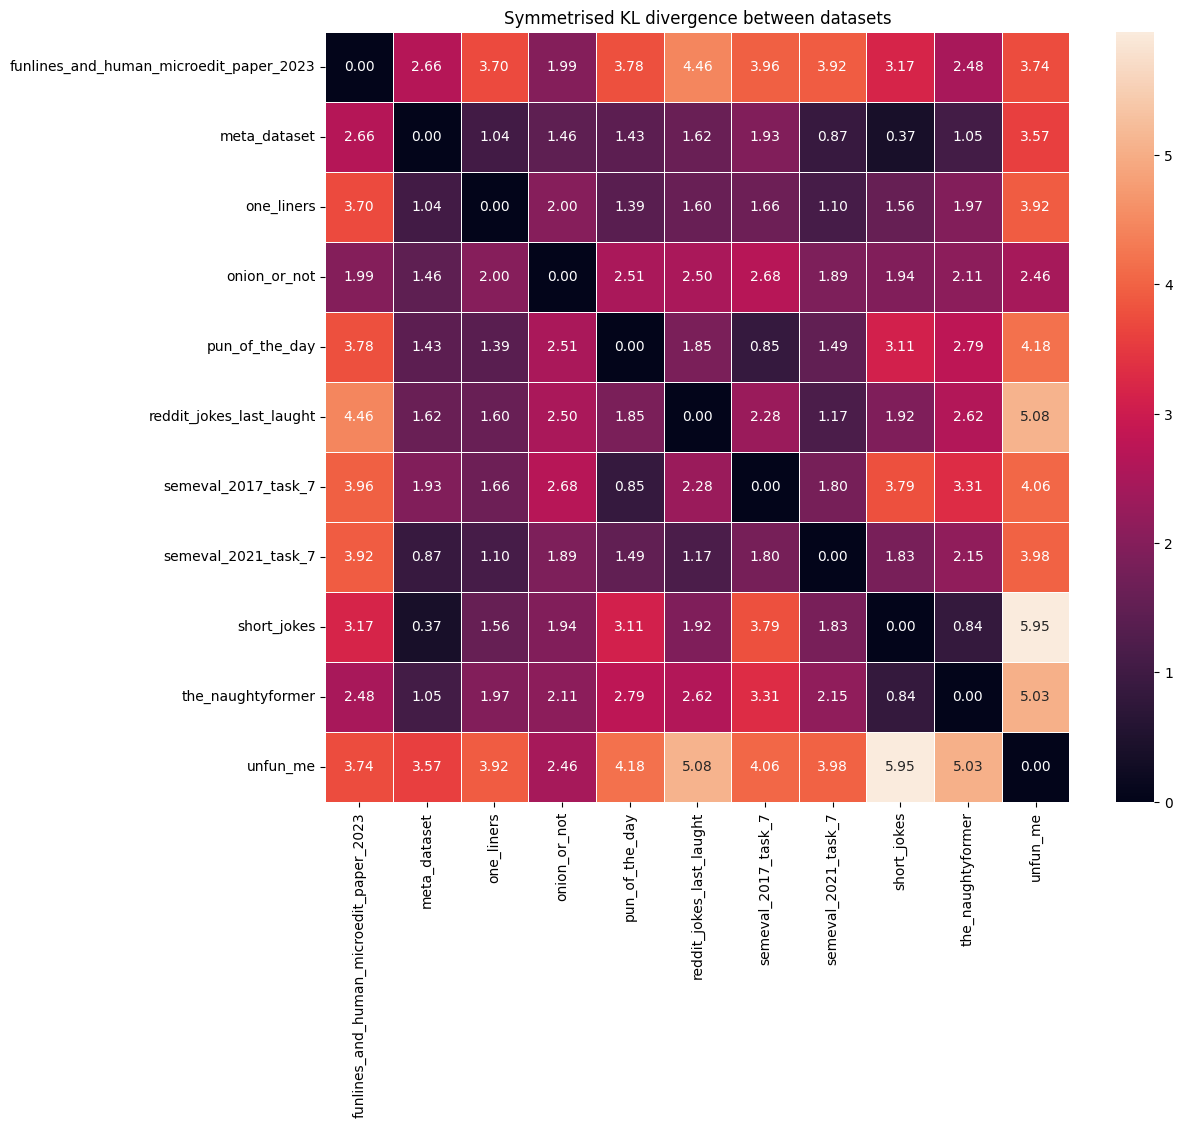

In [19]:
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(df_stat_pivot_symmetrised_kl, annot=True, fmt=".2f", ax=ax, linewidth=.5)
ax.set(xlabel="", ylabel="")
plt.title('Symmetrised KL divergence between datasets')
plt.savefig('Symmetrised KL divergence between datasets.png')

# Show vocab size

In [20]:
for i in range(len(all_data)):
    print(f'{all_data[i].name} | vocab_size:{all_data[i].vocab_size} | non unique words: {all_data[i].non_unique_words}')

funlines_and_human_microedit_paper_2023 | vocab_size:16134 | non unique words: 266484
one_liners | vocab_size:27905 | non unique words: 335415
onion_or_not | vocab_size:27319 | non unique words: 297149
pun_of_the_day | vocab_size:7491 | non unique words: 64117
reddit_jokes_last_laught | vocab_size:38128 | non unique words: 1108446
semeval_2017_task_7 | vocab_size:7916 | non unique words: 43924
semeval_2021_task_7 | vocab_size:17163 | non unique words: 208819
unfun_me | vocab_size:4328 | non unique words: 16087
short_jokes | vocab_size:579276 | non unique words: 17627024
the_naughtyformer | vocab_size:111510 | non unique words: 9239109
meta_dataset | vocab_size:81613 | non unique words: 1165904


In [12]:
for dh in all_data:
    print(dh.name, calc_divergence_between_target(copy.deepcopy(dh)))

funlines_and_human_microedit_paper_2023 0.30153753340618317
one_liners 1.7071668834760731
onion_or_not 1.5552950050194072
pun_of_the_day 1.3186404388523407
reddit_jokes_last_laught 0.9535245077553272
semeval_2017_task_7 2.289579547088767
semeval_2021_task_7 1.4900811009992587
unfun_me 0.6832617296264613
short_jokes 2.4777046252243515
the_naughtyformer 4.153205170199054
meta_dataset 1.8282144167998167


In [13]:
for i in range(len(all_data)):
    print()
    print(f"*****************BEGIN*****************")
    print(f"Dataset name: {all_data[i].name}")
    all_data[i].print_positive_sample()
    print()
    all_data[i].print_positive_sample()
    print()
    all_data[i].print_positive_sample()
    print()
    all_data[i].print_positive_sample()
    print()
    all_data[i].print_positive_sample()
    print(f"*****************END*******************")
    print()


*****************BEGIN*****************
Dataset name: funlines_and_human_microedit_paper_2023

        Example from "funlines_and_human_microedit_paper_2023" Dataset
        Humorous eaxmple: Bannon , Lewandowski invited to Lie  before House Intelligence Committee
        


        Example from "funlines_and_human_microedit_paper_2023" Dataset
        Humorous eaxmple: Warren Buffett 's cat  dumps its Fox stake
        


        Example from "funlines_and_human_microedit_paper_2023" Dataset
        Humorous eaxmple: Norwegians tell Trump : We do n't want to come to your s *** hole hotel
        


        Example from "funlines_and_human_microedit_paper_2023" Dataset
        Humorous eaxmple: Louisiana school district : All students must stand for lunch
        


        Example from "funlines_and_human_microedit_paper_2023" Dataset
        Humorous eaxmple: Rubio 's defection threatens Senate GOP 's margin on duck  bill
        
*****************END*******************


**********